# 2 - Nettoyage des données

---

**Import des dépendances et des données**   
Le [fichier CSV](https://static.openfoodfacts.org/data/en.openfoodfacts.org.products.csv) mise à disposition est d'une taille importante d'environ 3Go.  
Le fichier utilise l'encodage Unicode UTF-8. Le caractère de séparation des champs est <tab> (tabulation).   
Nous commençons donc par importer les librairies puis nous chargeons en mémoire les données.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

filenamePath = 'en.openfoodfacts.org.products.csv'
#usecols = ['code','nutriscore_grade','proteins_100g','carbohydrates_100g','fat_100g','salt_100g']

dataframe = pd.read_csv(filenamePath, sep='\t')

C:\Users\adrie\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,12,18,19,20,21,25,26,27,29,50,62,171) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Le chargement des données retourne un avertissement sur la présence de type différent dans la colonne 0.   
Ce n'est pas un probleme, le code-barres est en réalité une chaine de caractéres, car certains sont trop longs pour être stockés en type float64 par le systéme.

**Import des fonctions**

In [21]:
#Retourne une serie comportant le pourcentage de valeurs manquantes pour chaques colonnes du dataframe
def percentage_nan_by_columns(df):
    s = df.isnull().sum(axis = 0) / dataframe.shape[0] * 100.00
    s = s.transform(lambda x: '{:02.2f}'.format(x)+' %')
    return s

**Un premier regard**   
Je vais donc prendre connaissance du véritable contenu et de la qualité de mes données.

In [3]:
dataframe.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1486047 entries, 0 to 1486046
Data columns (total 182 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   code                                        object 
 1   url                                         object 
 2   creator                                     object 
 3   created_t                                   int64  
 4   created_datetime                            object 
 5   last_modified_t                             int64  
 6   last_modified_datetime                      object 
 7   product_name                                object 
 8   generic_name                                object 
 9   quantity                                    object 
 10  packaging                                   object 
 11  packaging_tags                              object 
 12  packaging_text                              object 
 13  brands                    

In [4]:
pd.options.display.max_columns = 182
dataframe.sample(50)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
616026,3229248293754,http://world-en.openfoodfacts.org/product/3229...,kiliweb,1551120186,2019-02-25T18:43:06Z,1551120191,2019-02-25T18:43:11Z,Les petites folie poire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,145.000000,607.0,NaN,0.500000,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

Le premier regard nous indique la présence de valeurs manquantes.   
Nous nous devons de répondre à un certains nombres de questions avant de nettoyer ce jeu de données.   

Nous allons pour cette analyse avoir besoin également d'autres colonnes comme les catégories afin de pouvoir recreer notre cible de prédiction, d'une maniére générale nous allons essayer de valider notre hypothése secondaire.

**Identification des valeurs manquantes 1**

In [5]:
pd.options.display.max_rows = 182
percentage_nan_by_columns(dataframe)

code                                            0.00 %
url                                             0.00 %
creator                                         0.00 %
created_t                                       0.00 %
created_datetime                                0.00 %
last_modified_t                                 0.00 %
last_modified_datetime                          0.00 %
product_name                                    4.58 %
generic_name                                   92.86 %
quantity                                       72.00 %
packaging                                      84.09 %
packaging_tags                                 84.09 %
packaging_text                                 99.99 %
brands                                         44.47 %
brands_tags                                    44.48 %
categories                                     49.27 %
categories_tags                                49.27 %
categories_en                                  49.27 %
origins   

Le pourcentage de valeurs manquantes reste faible pour les colonnes désirées, sauf pour la colonne nutriscore_grade 60% de valeurs manquantes.

In [6]:
dataframe2 = dataframe[['pnns_groups_2','countries','nutriscore_grade','categories']]
dataframe2 = dataframe2.dropna(axis='index')
index = dataframe2[dataframe2.pnns_groups_2 == 'unknown'].index
dataframe2 = dataframe2.drop(index)
#dataframe2['countries'].value_counts().head(100)
#dataframe2['pnns_groups_2'].value_counts().head(100)
#dataframe2['categories'].value_counts().head(100)

On peut se rendre compte en naviguant d'un manque de contraintes qui annonce une faible qualité des données.
Ma priorité va être de ne garder que les observations qui contiennent obligatoirement un nutriscore et les caractéritisques que je décide de garder pour mon analyse exploratoire et sur lesquelles je vais pouvoir recréer un classement.
Les pnns_groups contiennent une modalité = "unknown" en majorité, ce qui n'apportent pas d'informations utiles pour creer notre target, il faudra y penser pour plus tard.

In [22]:
dataframe3 = dataframe[['code', 'created_t','product_name',\
                        'categories','countries','nutriscore_score',\
                        'nutriscore_grade','pnns_groups_1','pnns_groups_2',\
                        'energy_100g','fat_100g','saturated-fat_100g',\
                        'carbohydrates_100g','sugars_100g','fiber_100g',\
                        'proteins_100g','salt_100g','sodium_100g']]
dataframe3 = dataframe3.dropna(subset=['nutriscore_grade','nutriscore_score','pnns_groups_1','pnns_groups_2','categories'], axis='index')
dataframe3.sample(5)

,code,created_t,product_name,categories,countries,nutriscore_score,nutriscore_grade,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
326518,0701243011128,1489143601,"Chin chin, juice drink, guava","Plant-based foods and beverages, Beverages, Pl...",United States,13.0,e,Beverages,Sweetened beverages,176.0,0.00,0.00,10.42,10.00,0.4,0.00,0.0275,0.011
383820,835144004337,1587641765,Blueberry granola clusters,"Plant-based foods and beverages, Plant-based f...",United States,7.0,c,Cereals and potatoes,Cereals,1795.0,12.50,1.79,71.43,25.00,7.1,7.14,0.3125,0.125
403887,857063002591,1489096929,Chicken Biryani,Frozen foods,United States,0.0,b,unknown,unknown,682.0,4.59,0.71,24.73,1.41,0.7,6.01,0.4500,0.180
1143548,6111243860994,1520119338,Ice tonic,"Boissons, Boissons gazeuses, Sodas, Eau toniqu...",France,16.0,e,Beverages,Sweetened beverages,163.0,0.00,0.00,9.70,0.00,NaN,0.00,2.4000,0.960
1152309,6410400033722,1519384085,Suomalainen Kaurahiutale,"Kasvipohjaiset ruoat ja juomat, Kasvipohjaiset...",Suomi,-5.0,a,Cereals and potatoes,Breakfast cereals,1510.0,7.50,1.30,54.00,1.10,11.0,14.00,0.0000,0.000


**Traitement des doublons**   
Le code-barres est censé être unique, on peut s'en servir comme identifiant.

In [8]:
dataframe3.duplicated(subset=['code']).value_counts()

False    590838
True         74
dtype: int64

Les doublons sont peu présents, je décide de ne pas m'en occuper.

**Identification des valeurs manquantes 2**   


<AxesSubplot:>

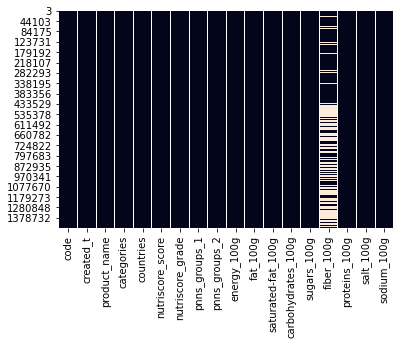

In [9]:
sns.heatmap(dataframe3.isnull(), cbar=False)

In [10]:
percentage_nan_by_columns(dataframe3)

code                   0.00 %
created_t              0.00 %
product_name           0.15 %
categories             0.00 %
countries              0.05 %
nutriscore_score       0.00 %
nutriscore_grade       0.00 %
pnns_groups_1          0.00 %
pnns_groups_2          0.00 %
energy_100g            0.10 %
fat_100g               0.11 %
saturated-fat_100g     0.11 %
carbohydrates_100g     0.13 %
sugars_100g            0.11 %
fiber_100g            15.38 %
proteins_100g          0.11 %
salt_100g              0.08 %
sodium_100g            0.08 %
dtype: object

Seulement 15% sur les fibres, vu la taille importante du dataset, je décide de ne pas garder les lignes qui ont des données manquantes.

In [11]:
dataframe4 = dataframe3.dropna(axis='index')

**Renommage des colonnes**

In [12]:
dataframe4 = dataframe4.rename(
    columns={"code": "code_barres",
             "created_t":"date_creation",
             "product_name": "nom_produit",
             "categories": "categories",
             "nutriscore_score": "nutriscore_score",
             "nutriscore_grade": "nutriscore_grade",
             "pnns_groups_1": "pnns_groupes_1",
             "pnns_groups_2": "pnns_groupes_2",
             "energy_100g": "energie_100g",
             "fat_100g": "matieres_grasses_100g",
             "saturated-fat_100g": "matieres_grasses_saturees_100g",
             "carbohydrates_100g": "glucides_100g",
             "sugars_100g": "glucides_sucres_100g",
             "fiber_100g": "fibres_100g",
             "proteins_100g": "proteines_100g",
             "salt_100g": "sel_100g",
             "sodium_100g": "sodium_100g"})

**Conversions**   
conversions de la date de creation au format pandas à partir du timestamp

In [13]:
dataframe4['date_creation'] = pd.to_datetime(dataframe4['date_creation'])

**Feature imputation**   
Aucune

**Vérification de l'intégrité et suppression des valeurs aberrantes**   
Les nutriments doivent être compris entre 0 et 100 grammes pour 100 grammes.

In [14]:
dataframe4.describe()

,nutriscore_score,energie_100g,matieres_grasses_100g,matieres_grasses_saturees_100g,glucides_100g,glucides_sucres_100g,fibres_100g,proteines_100g,sel_100g,sodium_100g
count,360771.000000,3.607710e+05,360771.000000,3.607710e+05,360771.000000,360771.000000,360771.000000,360771.000000,360771.000000,360771.000000
mean,8.282151,1.195034e+03,13.144434,3.769704e+08,32.655182,14.015110,2.849223,7.894641,1.689660,0.676034
std,9.072810,1.051299e+04,16.197263,2.264243e+11,27.742885,18.689771,4.621336,8.926035,169.213309,67.685859
min,-15.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,-1.000000,-20.000000,0.000000,0.000000,0.000000
25%,0.000000,4.440000e+02,0.900000,0.000000e+00,7.140000,1.300000,0.000000,2.080000,0.100000,0.040000
50%,9.000000,1.163000e+03,7.060000,1.700000e+00,23.940000,4.880000,1.500000,5.880000,0.605000,0.242000
75%,15.000000,1.720000e+03,21.000000,6.670000e+00,57.600000,21.430000,3.600000,10.810000,1.265000,0.506000
max,40.000000,5.578665e+06,1000.000000,1.360000e+14,1390.000000,1350.000000,625.000000,2000.000000,99500.000000,39800.000000


On peut voir que les colonnes qui ont des valeurs abbérantes sur max et min.
Ce n'est pas un probleme d'unité, nous les supprimons.

In [30]:
dataframe5 = dataframe4.query('0 <= matieres_grasses_100g <= 100 \
                                    and 0 <= energie_100g <= 3800 \
                                    and 0 <= matieres_grasses_saturees_100g <= 100 \
                                    and 0 <= glucides_100g <= 100 \
                                    and 0 <= glucides_sucres_100g <= 100 \
                                    and 0 <= fibres_100g <= 100 \
                                    and 0 <= proteines_100g <= 100 \
                                    and 0 <= sel_100g <= 100 \
                                    and 0 <= sodium_100g <= 100 \
                                    and matieres_grasses_100g+glucides_100g+fibres_100g+proteines_100g+sel_100g <= 100')

In [31]:
dataframe5.shape

(326136, 18)

In [32]:
dataframe5.describe()

,nutriscore_score,energie_100g,matieres_grasses_100g,matieres_grasses_saturees_100g,glucides_100g,glucides_sucres_100g,fibres_100g,proteines_100g,sel_100g,sodium_100g
count,326136.000000,326136.000000,326136.000000,326136.000000,326136.000000,326136.000000,326136.000000,326136.000000,326136.000000,326136.000000
mean,7.881694,1071.727037,11.540649,4.286884,30.400947,13.417355,2.223937,7.417665,1.090624,0.436415
std,9.009286,729.444945,15.041993,6.844597,27.241995,18.205180,3.387192,8.066589,3.394376,1.360531
min,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,393.000000,0.610000,0.000000,6.530000,1.200000,0.000000,1.610000,0.100000,0.040000
50%,8.000000,1046.000000,5.600000,1.340000,20.000000,4.650000,1.200000,5.260000,0.600000,0.240000
75%,15.000000,1611.000000,17.860000,6.060000,54.500000,20.000000,3.200000,10.230000,1.270000,0.508000
max,36.000000,3791.000000,100.000000,100.000000,100.000000,100.000000,100.000000,94.000000,100.000000,49.987200


Nous vérifions qu'il n'y a bien que les 5 classes pour le Nutriscore.

In [33]:
dataframe5.nutriscore_grade.unique()

array(['d', 'a', 'c', 'b', 'e'], dtype=object)

**Export pour analyse**

In [34]:
dataframe5.to_csv("en.openfoodfacts.org.products-df5.csv",index=False)